In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score

In [14]:
# Load dataset
df = pd.read_csv("data/processed-data.csv")

# Perform one-hot encoding for categorical columns if necessary (adjust columns accordingly)
df = pd.get_dummies(df, columns=['ph', 'rainfall'])

# Split the dataframe into features (X) and labels (y)
X = df.drop(columns=["label"])
y = df["label"]

# Split the data to 90-10 (90% training and testing, 10% unseen)
x_train_test, x_unseen, y_train_test, y_unseen = train_test_split(X, y, test_size=0.1, random_state=42)

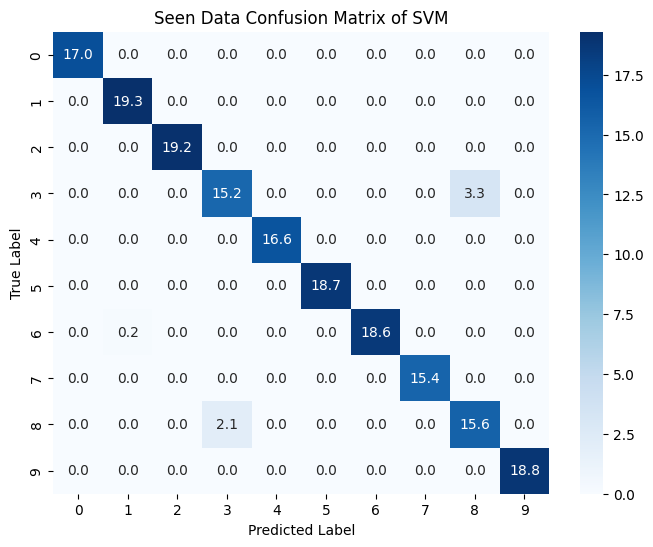

In [18]:
# Instantiate a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Instantiate a cross-validation method (80% training, 20% testing)
sp = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

# Create a list of metrics needed
metrics = ["accuracy", "precision_macro", "recall_macro", "roc_auc_ovr"]

# Perform cross-validation and obtain the metrics
metrics_results = cross_validate(model, x_train_test, y_train_test, cv=sp, scoring=metrics, return_estimator=True)

# Initialize a list to store the confusion matrices
conf_matrices = []

# Obtain the confusion matrices for all folds
for estimator, (_, test_index) in zip(metrics_results['estimator'], sp.split(x_train_test, y_train_test)):
    # Predict using the test set
    y_pred = estimator.predict(x_train_test.iloc[test_index])

    # Compute the confusion matrix for this iteration
    conf_matrix = confusion_matrix(y_train_test.iloc[test_index], y_pred)

    # Append the matrix to the list
    conf_matrices.append(conf_matrix)

# Compute the average confusion matrix
conf_matrix_avg = np.mean(conf_matrices, axis=0)

# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_avg, annot=True, fmt=".1f", cmap="Blues", xticklabels=range(10), yticklabels=range(10))

# Labels and title
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Seen Data Confusion Matrix of SVM")
plt.show()

In [19]:
# Results for the cross-validation
print("\nCross-Validation Evaluation Results:")
print(f"Accuracy: {metrics_results['test_accuracy'].mean():.4f}")
print(f"Precision: {metrics_results['test_precision_macro'].mean():.4f}")
print(f"Recall: {metrics_results['test_recall_macro'].mean():.4f}")
print(f"ROC AUC: {metrics_results['test_roc_auc_ovr'].mean():.4f}")


Cross-Validation Evaluation Results:
Accuracy: 0.9689
Precision: 0.9707
Recall: 0.9704
ROC AUC: 0.9985


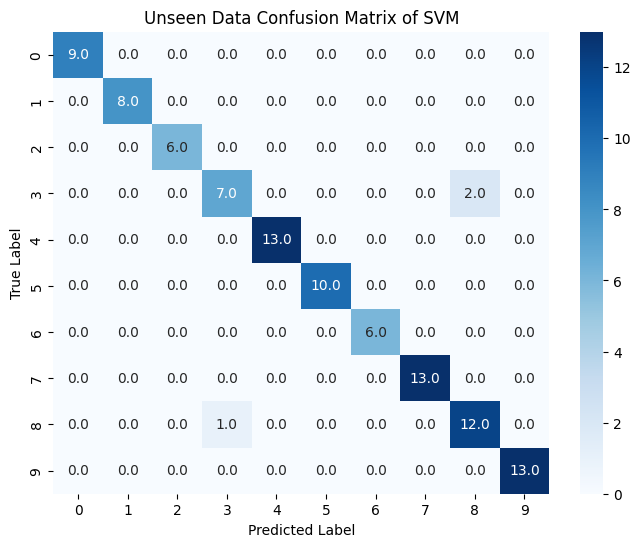

In [20]:
# Fit the model
model.fit(x_train_test, y_train_test)

# Predict on unseen data
y_pred = model.predict(x_unseen)

# Compute metrics
conf_matrix = confusion_matrix(y_unseen, y_pred)
accuracy = accuracy_score(y_unseen, y_pred)
precision = precision_score(y_unseen, y_pred, average='weighted')
recall = recall_score(y_unseen, y_pred, average='weighted')
roc_auc = roc_auc_score(y_unseen, model.predict_proba(x_unseen), multi_class='ovr')

# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt=".1f", cmap="Blues", xticklabels=range(10), yticklabels=range(10))

# Labels and title
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Unseen Data Confusion Matrix of SVM")
plt.show()

In [21]:
# Results for the unseen set
print("\nUnseen Set Evaluation Results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")


Unseen Set Evaluation Results:
Accuracy: 0.9700
Precision: 0.9702
Recall: 0.9700
ROC AUC: 0.9987
